In [3]:
# Import all the libraries required.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Reading the data from remote link.

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported sucessfully...")
data.head(21)

Data imported sucessfully...


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values
print("Created Labels and attributes successfully...")

Created Labels and attributes successfully...


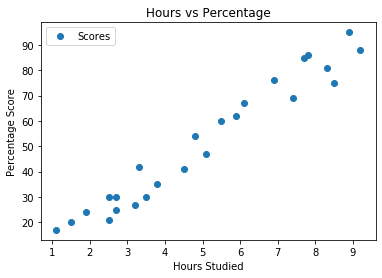

In [8]:
# Plotting the distribution graph of scores in 2D.

data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

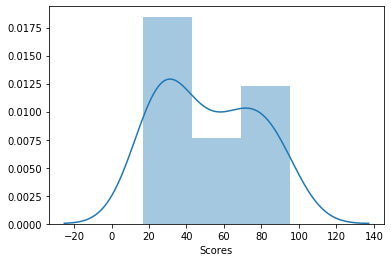

In [9]:
# Check scores distribution.

sns.distplot(data['Scores'])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Training the algorithm.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training Completed...")

Training Completed...


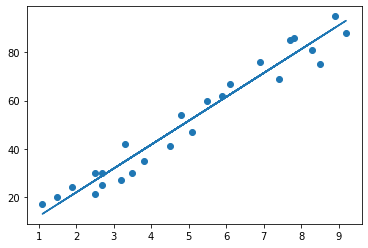

In [12]:
# Plotting the regression line...

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data...

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [13]:
# Making Predictions...

print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) #Predicting Scores...

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing Actual and Predicted...

df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


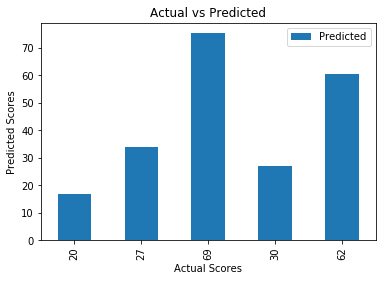

In [15]:
# Showing Predicted values with actual values.

df.plot(x = 'Actual', y = 'Predicted', kind = 'bar')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

In [16]:
# Testing the data asked...
 
Hours = 9.25
pred = regressor.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [25]:
# Evaluating the model...

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
